In [1]:
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D,LeakyReLU

from keras.applications.vgg19 import VGG19

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
import math
import numpy as np
from keras import optimizers
from keras.applications import VGG19
from keras.utils import to_categorical
from keras.models import load_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\labels.csv')
df.head()

,Image,Category
0,0,NEUTROPHIL
1,1,NEUTROPHIL
2,2,NEUTROPHIL
3,3,NEUTROPHIL
4,4,NEUTROPHIL


In [3]:
df.tail()

,Image,Category
494,494,MM
495,495,MM
496,496,MM
497,497,MM
498,498,MM


In [4]:
df.shape

(499, 2)

Text(0.5, 1.0, 'EOSINOPHIL')

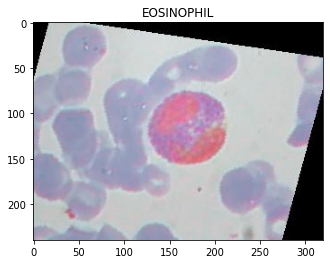

In [5]:
im=cv2.imread(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\images\\TRAIN\\EOSINOPHIL\\_0_1169.jpeg')
plt.imshow(im)
plt.title('EOSINOPHIL')

Text(0.5, 1.0, 'LYMPHOCYTE')

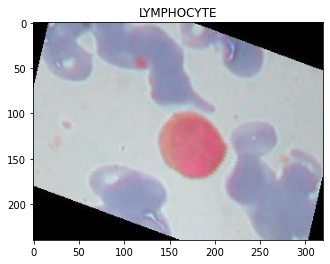

In [6]:
im2=cv2.imread(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\images\\TRAIN\\LYMPHOCYTE\\_0_1063.jpeg')
plt.imshow(im2)
plt.title('LYMPHOCYTE')

Text(0.5, 1.0, 'MONOCYTE')

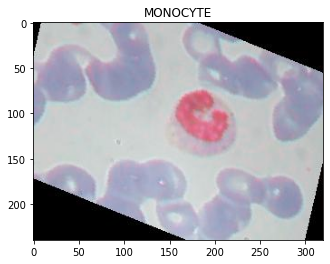

In [7]:
im3=cv2.imread(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\images\\TRAIN\\MONOCYTE\\_0_2814.jpeg')
plt.imshow(im3)
plt.title('MONOCYTE')

Text(0.5, 1.0, 'NEUTROPHIL')

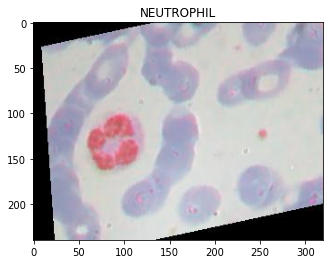

In [8]:
im4=cv2.imread(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\images\\TRAIN\\NEUTROPHIL\\_0_4170.jpeg')
plt.imshow(im4)
plt.title('NEUTROPHIL')

Text(0.5, 1.0, 'ALL')

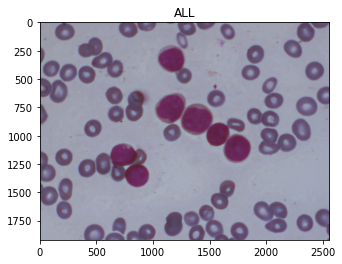

In [9]:
im5=cv2.imread(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\images\\TRAIN\\ALL\\ALL_1.bmp')
plt.imshow(im5)
plt.title('ALL')

Text(0.5, 1.0, 'MM')

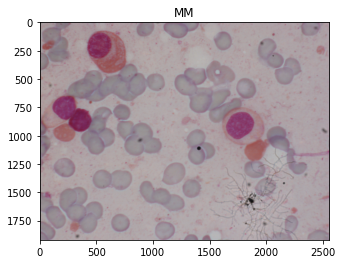

In [10]:
im6=cv2.imread(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\images\\TRAIN\\MM\\MM_1.bmp')
plt.imshow(im6)
plt.title('MM')

In [11]:
def grey_image(image,cell_name):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    plt.title('GRAY SCALE {}'.format(cell_name)) 
    return gray

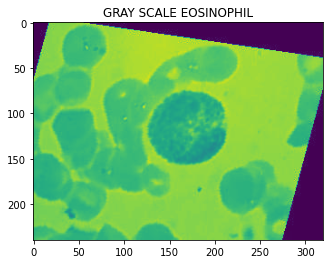

In [12]:
grey=grey_image(im,'EOSINOPHIL')

In [13]:
def threshold(gray_image):
    th2 = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    plt.imshow(th2)
    return th2

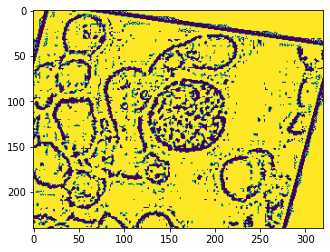

In [14]:
th2 = threshold(grey)

In [15]:
def edge_detection(image):
    edges = cv2.Canny(im,20,100)
    plt.imshow(edges)
    return edges

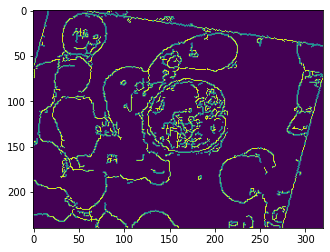

In [16]:
edges=edge_detection(im)

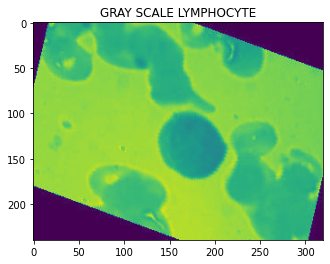

In [17]:
grey_lymph=grey_image(im2,'LYMPHOCYTE')

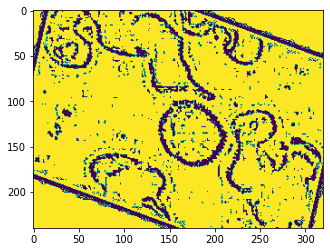

In [18]:
th3=threshold(grey_lymph)

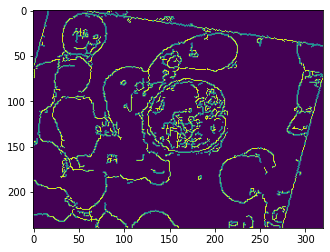

In [19]:
edges_lymph=edge_detection(im2)

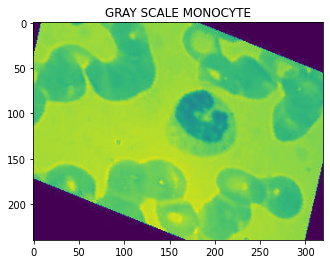

In [20]:
grey_mono=grey_image(im3,'MONOCYTE')

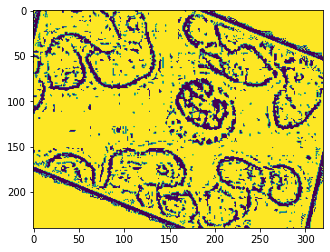

In [21]:
th4=threshold(grey_mono)

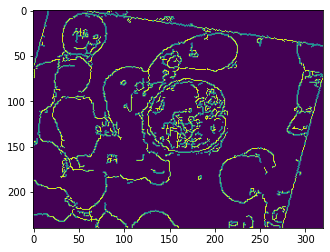

In [22]:
edges_mono=edge_detection(im3)

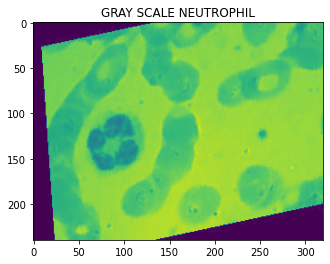

In [23]:
grey_neutro=grey_image(im4,'NEUTROPHIL')

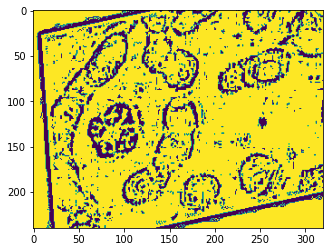

In [24]:
th4=threshold(grey_neutro)

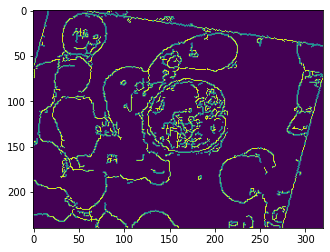

In [25]:
edges_neutro=edge_detection(im4)

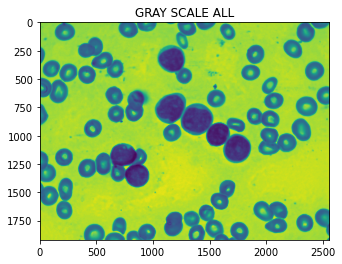

In [26]:
grey_all=grey_image(im5,'ALL')

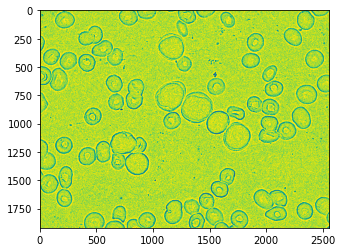

In [27]:
th5=threshold(grey_all)

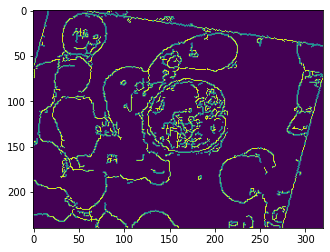

In [28]:
edges_all=edge_detection(im5)

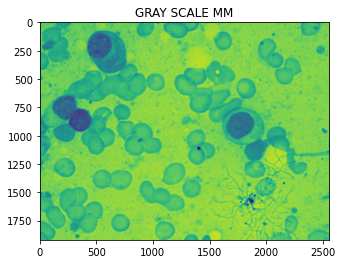

In [29]:
grey_mm=grey_image(im6,'MM')

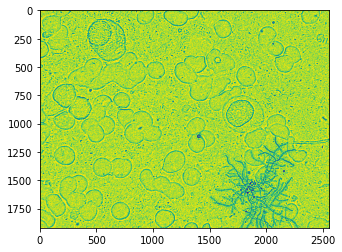

In [30]:
th6=threshold(grey_mm)

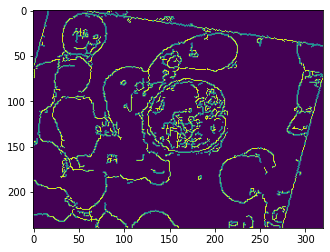

In [31]:
edges_mm=edge_detection(im6)

In [32]:
TRAIN_PATH=r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\images\\TRAIN'
TEST_PATH=r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\images\\VALIDATION'

In [33]:
model = tf.keras.applications.VGG19(include_top=False, weights='imagenet',input_shape=(150,150,3))

In [34]:
datagen = ImageDataGenerator(rescale=1. / 255)
batch_size=50

In [35]:
def get_data():
    X= datagen.flow_from_directory(
        TRAIN_PATH,
        target_size=(150, 150),
        batch_size=batch_size,classes=['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL','ALL','MM'],
        class_mode='categorical',
        shuffle=False)
    y= datagen.flow_from_directory(
        TEST_PATH,
        target_size=(150, 150),
        batch_size=batch_size,classes=['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL','ALL','MM'],
        class_mode='categorical',
        
        shuffle=False)

    return X,y

In [36]:
X_train,y_test=get_data()

Found 14502 images belonging to 6 classes.
Found 212 images belonging to 6 classes.


In [37]:
nb_train_samples = len(X_train.filenames) 
num_classes = len(X_train.class_indices)
predict_size_train = int(math.ceil(nb_train_samples / batch_size))
bottleneck_features_train = model.predict(X_train,predict_size_train)
np.save(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\bottleneck_features_train.npy', bottleneck_features_train)

In [38]:
nb_test_samples = len(y_test.filenames) 
num_classes = len(y_test.class_indices)
predict_size_test = int(math.ceil(nb_test_samples / batch_size))
bottleneck_features_test = model.predict(y_test,predict_size_test)
np.save(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\bottleneck_features_validation.npy', bottleneck_features_test)

In [39]:
train_data = np.load(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\bottleneck_features_train.npy')
test_data = np.load(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\bottleneck_features_validation.npy')

In [40]:
num_classes = len(X_train.class_indices) 
train_target = to_categorical(X_train.labels)
test_target=to_categorical(y_test.labels)

In [41]:
class Model:
    def __init__(self, classes, optimizer):
        self.classes = classes
        self.optimizer = optimizer
    def build_model(self):
        model=Sequential()
        model.add(Flatten(input_shape=train_data.shape[1:]))
        model.add(Dense(self.classes, activation='softmax'))
        model.compile(loss='categorical_crossentropy',optimizer=self.optimizer,metrics=['acc'])
        print(model.summary())
        return model

In [42]:
m=Model(num_classes,'adam')
model=m.build_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 49158     
Total params: 49,158
Trainable params: 49,158
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
history = model.fit(train_data,train_target,epochs=40,batch_size=batch_size)

Epoch 1/40
291/291 [==============================] - 2s 4ms/step - loss: 1.1513 - acc: 0.5298
Epoch 2/40
291/291 [==============================] - 1s 4ms/step - loss: 0.6469 - acc: 0.7747
Epoch 3/40
291/291 [==============================] - 1s 4ms/step - loss: 0.5173 - acc: 0.8352
Epoch 4/40
291/291 [==============================] - 1s 4ms/step - loss: 0.4296 - acc: 0.8608
Epoch 5/40
291/291 [==============================] - 1s 4ms/step - loss: 0.3888 - acc: 0.8749
Epoch 6/40
291/291 [==============================] - 1s 4ms/step - loss: 0.3323 - acc: 0.8977
Epoch 7/40
291/291 [==============================] - 1s 4ms/step - loss: 0.2989 - acc: 0.9133
Epoch 8/40
291/291 [==============================] - 1s 4ms/step - loss: 0.2738 - acc: 0.9241
Epoch 9/40
291/291 [==============================] - 1s 4ms/step - loss: 0.2661 - acc: 0.9195
Epoch 10/40
291/291 [==============================] - 1s 4ms/step - loss: 0.2442 - acc: 0.9275
Epoch 11/40
291/291 [============================

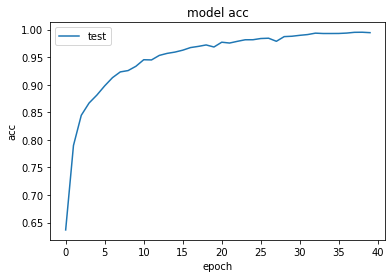

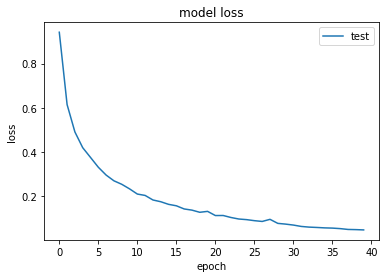

In [44]:
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
plt.plot(history.history['acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper right')
plt.show()

In [45]:
save_model_vgg2=model.save(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\savemodelvgg19.h5')

In [46]:
loadmodel=load_model(r'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Leukocount-main\\Leukocount-main\\dataset2-master\\dataset2-master\\savemodelvgg19.h5')

In [47]:
def prediction():
    pred=loadmodel.evaluate(test_data,test_target,batch_size=50)
    return pred

In [48]:
prediction()

5/5 [==============================] - 0s 2ms/step - loss: 0.1096 - acc: 0.9717


[0.10959390550851822, 0.9716981053352356]

In [49]:
pred=np.round(loadmodel.predict(test_data),0)

In [50]:
cells=['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL','ALL','MM']
m=metrics.classification_report(test_target,pred,target_names=cells)
print(m)

              precision    recall  f1-score   support

  EOSINOPHIL       0.76      1.00      0.87        13
  LYMPHOCYTE       0.71      0.83      0.77         6
    MONOCYTE       1.00      1.00      1.00         4
  NEUTROPHIL       1.00      0.90      0.95        48
         ALL       1.00      1.00      1.00        64
          MM       1.00      1.00      1.00        77

   micro avg       0.97      0.97      0.97       212
   macro avg       0.91      0.95      0.93       212
weighted avg       0.98      0.97      0.97       212
 samples avg       0.97      0.97      0.97       212



In [51]:
eos=lymph=mono=neutro=all_1=mm=0

In [52]:
def single_pred(path):
    image=load_img(path,target_size=(150,150))
    image=img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image/=255
    classes=['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL','ALL','MM']
    bt_prediction = model.predict(image) 
    singlepred = loadmodel.predict_classes(bt_prediction)
    graph(classes[int(singlepred)])
    return classes[int(singlepred)]

In [53]:
eos=lymph=mono=neutro=all_1=mm=0
def graph(type_cell):
    global eos,lymph,mono,neutro
    classes=['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL','ALL','MM']
    my_colors = ['r','g','b','c','m','y']
    
    for path in type_cell:
        
        image=load_img(path,target_size=(150,150))
        image=img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image/=255.
        bt_prediction = model.predict(image) 
        singlepred = loadmodel.predict_classes(bt_prediction)
        
        if(classes[int(singlepred)]=='EOSINOPHIL'):
            eos=eos+1
        elif(classes[int(singlepred)]=='LYMPHOCYTE'):
            lymph=lymph+1
        elif(classes[int(singlepred)]=='MONOCYTE'):
            mono=mono+1
        elif(classes[int(singlepred)]=='NEUTROPHIL'):
            neutro=neutro+1
        elif(classes[int(singlepred)]=='ALL'):
            all_1=all_1+1
        else:
            mm=mm+1
    val=[eos,lymph,mono,neutro,all_1,mm]
    bars=plt.bar(classes,val,color=my_colors,width=0.3)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+0.10, yval + .005, yval)
    
    plt.xlabel('Types of cell')
    plt.ylabel('Count')
    return plt.show()

In [54]:
classes=['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL','ALL','MM']

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Greens',
                          title=None):
    
    
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    
    if sum_stats:
        
        accuracy  = np.trace(cf) / float(np.sum(cf))

        
        if len(cf)==2:
            
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    
    if figsize==None:
        
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        
        categories=False


    
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [56]:
cf_matrix=confusion_matrix(test_target.argmax(axis=1),pred.argmax(axis=1))

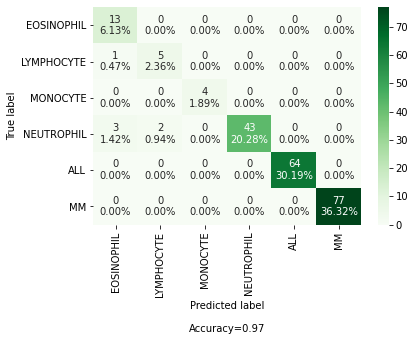

In [57]:
make_confusion_matrix(cf_matrix,categories=classes)